In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/Shareddrives/Urban\ Computing\ Project/datasets

/content/drive/Shareddrives/Urban Computing Project/datasets


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import sys
customized_path = "/content/drive/Shareddrives/Urban Computing Project/"
sys.path.append(customized_path)

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
!ls

 aggregated_taxi_and_at_the_stop_bus_data.csv
 aggregated_taxi_and_bus_data_with_lid.csv
'aggregated_taxi_bus_data (1).gsheet'
 aggregated_taxi_bus_data.csv
 aggregated_taxi_bus_data.gsheet
 archive.zip
 atstop_zone.csv
 AugustCleaned.csv
 AugustCleanedV2.csv
 AugustCleanedV3.csv
 computed_geocodes_2.csv
 computed_geocodes.csv
 corrected_google_lat_long.csv
 DecemberCleaned.csv
 DecemberCleanedV2.csv
 DecemberCleanedV3.csv
 junbusfinal.csv
 JuneCleaned.csv
 JuneCleanedV2.csv
 JuneCleanedV3.csv
 juntaxifinal.csv
 missing_after_google.csv
 mta_1706.csv
 mta_1708.csv
 mta_1710.csv
 mta_1712.csv
 next_stop_locations.csv
 next_stop_possibility.csv
 next_stop_possibility_with_google.csv
 next_stop_with_zone.csv
 OctoberCleaned.csv
 OctoberCleanedV2.csv
 OctoberCleanedV3.csv
 taxi_agg_bq.csv
 taxi_zones.dbf
 taxi_zones.prj
 taxi_zones.sbn
 taxi_zones.sbx
 taxi_zones.shp
 taxi_zones.shp.xml
 taxi_zones.shx
 taxi_zones.zip
 yellow_tripdata_2017-06.csv


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/aggregated_taxi_and_bus_data_with_lid.csv')

In [ ]:
data.head()

,timekey,locationID,BusesThatReachedStop,BusesThatReachedLate,OnTimeBuses,AvgLeadTime,AvgLateTime,TaxiTripsBookedAtTimeSlot,TaxiAvgFareAtTimeSlot,TaxiAvgPassAtTimeSlot,TaxiTotalFareAtTimeSlot,TaxiAvgTripDistAtTimeSlot,TaxiAvgTripTimeAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiAvgFareAtTMinusFiveSlot,TaxiAvgPassAtTMinusFiveSlot,TaxiTotalFareAtTMinusFiveSlot,TaxiAvgTripDistAtTMinusFiveSlot,TaxiAvgTripTimeAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiAvgFareAtTMinusTenSlot,TaxiAvgPassAtTMinusTenSlot,TaxiTotalFareAtTMinusTenSlot,TaxiAvgTripDistAtTMinusTenlot,TaxiAvgTripTimeAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,TaxiAvgFareAtTMinusFifteenSlot,TaxiAvgPassAtTMinusFifteenSlot,TaxiTotalFareAtTMinusFifteenSlot,TaxiAvgTripDistAtTMinusFifteenSlot,TaxiAvgTripTimeAtTMinusFifteenSlot,TaxiTripsBookedAtTMinusTwentySlot,TaxiAvgFareAtTMinusTwentySlot,TaxiAvgPassAtTMinusTwentySlot,TaxiTotalFareAtTMinusTwentySlot,TaxiAvgTripDistAtTMinusTwentySlot,TaxiAvgTripTimeAtTMinusTwentySlot
0,2017-10-14 08:10:00 UTC,42,1,0,1,1.0,0.0,2,0.000000e+00,1.500000,0.0,0,14.000000,2,0.000000e+00,1.50,0.000000e+00,0,9.00,1,0.0,1.0,0.0,0,8.0,2,0.000000e+00,2.0,0.0,0,8.000000,2,0.000000e+00,2.000000,-1.500000e-08,0,17.5
1,2017-10-15 21:50:00 UTC,125,1,0,1,19.0,0.0,6,-1.400000e-08,1.333333,0.0,0,14.833333,4,-1.000000e-08,1.75,-1.000000e-08,0,14.25,1,0.0,2.0,0.0,0,4.0,6,-7.000000e-09,1.5,0.0,0,12.833333,5,0.000000e+00,1.000000,0.000000e+00,0,6.4
2,2017-10-20 19:10:00 UTC,232,1,0,1,21.0,0.0,1,0.000000e+00,1.000000,0.0,0,8.000000,2,-2.100000e-08,2.50,0.000000e+00,0,20.50,1,0.0,1.0,0.0,0,8.0,4,-2.600000e-08,1.0,0.0,0,35.500000,3,-1.800000e-08,2.333333,0.000000e+00,0,46.0
3,2017-10-25 06:50:00 UTC,209,1,0,1,1.0,0.0,1,-3.700000e-08,1.000000,0.0,0,22.000000,4,-2.100000e-08,1.50,0.000000e+00,0,13.50,1,0.0,1.0,0.0,0,79.0,1,0.000000e+00,1.0,0.0,0,17.000000,3,-3.400000e-08,1.000000,-1.400000e-08,0,25.0
4,2017-10-25 19:30:00 UTC,232,1,0,1,2.0,0.0,3,-8.000000e-09,1.000000,0.0,0,13.000000,2,0.000000e+00,3.00,0.000000e+00,0,16.50,1,0.0,1.0,0.0,0,22.0,2,0.000000e+00,1.5,0.0,0,7.000000,5,0.000000e+00,1.800000,-7.000000e-09,0,10.8


In [ ]:
data.describe()

,locationID,BusesThatReachedStop,BusesThatReachedLate,OnTimeBuses,AvgLeadTime,AvgLateTime,TaxiTripsBookedAtTimeSlot,TaxiAvgFareAtTimeSlot,TaxiAvgPassAtTimeSlot,TaxiTotalFareAtTimeSlot,TaxiAvgTripDistAtTimeSlot,TaxiAvgTripTimeAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiAvgFareAtTMinusFiveSlot,TaxiAvgPassAtTMinusFiveSlot,TaxiTotalFareAtTMinusFiveSlot,TaxiAvgTripDistAtTMinusFiveSlot,TaxiAvgTripTimeAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiAvgFareAtTMinusTenSlot,TaxiAvgPassAtTMinusTenSlot,TaxiTotalFareAtTMinusTenSlot,TaxiAvgTripDistAtTMinusTenlot,TaxiAvgTripTimeAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,TaxiAvgFareAtTMinusFifteenSlot,TaxiAvgPassAtTMinusFifteenSlot,TaxiTotalFareAtTMinusFifteenSlot,TaxiAvgTripDistAtTMinusFifteenSlot,TaxiAvgTripTimeAtTMinusFifteenSlot,TaxiTripsBookedAtTMinusTwentySlot,TaxiAvgFareAtTMinusTwentySlot,TaxiAvgPassAtTMinusTwentySlot,TaxiTotalFareAtTMinusTwentySlot,TaxiAvgTripDistAtTMinusTwentySlot,TaxiAvgTripTimeAtTMinusTwentySlot
count,229340.000000,229340.000000,229340.000000,229340.000000,229340.000000,229340.000000,229340.000000,2.293400e+05,229340.000000,2.293400e+05,229340.0,229340.000000,229340.000000,2.293400e+05,229340.000000,2.293400e+05,229340.0,229340.000000,229340.000000,2.293400e+05,229340.000000,2.293400e+05,229340.0,229340.000000,229340.000000,2.293400e+05,229340.000000,2.293400e+05,229340.0,229340.000000,229340.000000,2.293400e+05,229340.000000,2.293400e+05,229340.0,229340.000000
mean,140.589640,1.539387,1.084686,0.454700,1.994503,7.782977,21.505254,-6.424383e-09,1.621403,7.981163e-11,0.0,15.907759,21.456911,-6.370188e-09,1.620634,1.466120e-10,0.0,16.126951,21.415335,-6.477283e-09,1.621165,1.394959e-10,0.0,15.841691,21.372425,-5.637704e-09,1.620521,1.213046e-10,0.0,16.132247,21.311699,-6.199097e-09,1.620292,1.934726e-10,0.0,15.830367
std,72.826448,1.063158,0.960414,0.685219,6.746828,10.110727,17.930569,1.635917e-07,0.480801,4.636809e-08,0.0,140.633648,17.921232,1.630749e-07,0.482673,5.312258e-08,0.0,22.545201,17.920086,1.810321e-07,0.483129,6.083148e-08,0.0,140.699165,17.903198,4.765764e-07,0.486153,6.500853e-08,0.0,22.916877,17.877388,1.847081e-07,0.484570,4.904191e-08,0.0,140.687136
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.435700e-05,0.000000,-2.139000e-06,0.0,-66396.083333,1.000000,-2.922500e-05,0.000000,-4.245000e-06,0.0,0.000000,1.000000,-2.896900e-05,0.000000,-1.284100e-05,0.0,-66396.083333,1.000000,-2.922500e-05,0.000000,-1.051500e-05,0.0,0.000000,1.000000,-2.922500e-05,0.000000,-3.219000e-06,0.0,-66396.083333
25%,79.000000,1.000000,1.000000,0.000000,0.000000,1.000000,7.000000,-1.300000e-08,1.342105,-1.000000e-09,0.0,10.333333,7.000000,-1.300000e-08,1.333333,-1.000000e-09,0.0,10.333333,7.000000,-1.300000e-08,1.333333,-1.000000e-09,0.0,10.333333,7.000000,-1.300000e-08,1.333333,-1.000000e-09,0.0,10.323529,7.000000,-1.300000e-08,1.333333,-1.000000e-09,0.0,10.307692
50%,142.000000,1.000000,1.000000,0.000000,0.000000,5.000000,18.000000,-9.000000e-09,1.571429,0.000000e+00,0.0,12.870370,17.000000,-9.000000e-09,1.571429,0.000000e+00,0.0,12.857143,17.000000,-9.000000e-09,1.571429,0.000000e+00,0.0,12.852700,17.000000,-9.000000e-09,1.571429,0.000000e+00,0.0,12.863636,17.000000,-9.000000e-09,1.571429,0.000000e+00,0.0,12.857143
75%,209.000000,2.000000,1.000000,1.000000,1.000000,11.000000,31.000000,-6.000000e-09,1.806452,0.000000e+00,0.0,16.043478,31.000000,-5.000000e-09,1.806452,0.000000e+00,0.0,16.000000,31.000000,-5.000000e-09,1.807692,0.000000e+00,0.0,16.000000,31.000000,-5.000000e-09,1.807692,0.000000e+00,0.0,16.000000,31.000000,-5.000000e-09,1.807692,0.000000e+00,0.0,16.013403
max,263.000000,16.000000,13.000000,10.000000,543.000000,277.000000,158.000000,1.992700e-05,9.000000,9.373000e-06,0.0,1436.000000,163.000000,2.811900e-05,6.000000,9.964000e-06,0.0,1437.000000,204.000000,3.247100e-05,6.000000,9.373000e-06,0.0,1438.000000,165.000000,2.153530e-04,7.000000,9.964000e-06,0.0,1438.000000,156.000000,3.247100e-05,7.000000,6.642000e-06,0.0,1439.0

# Visualizing the Data  ඞ

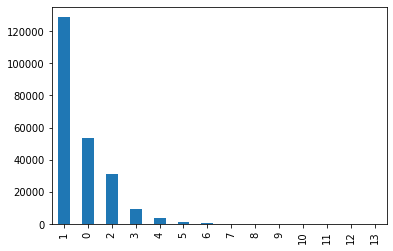

In [ ]:
data.BusesThatReachedLate.value_counts().plot(kind='bar')

# Feature Engineering for first test run (Modelling as a Classification Problem with a primitive set of Features)

Running with timekey, stopName, TaxiTripsbookedAtTimeslot

In [ ]:
run1=data[['timekey','locationID','BusesThatReachedLate','TaxiTripsBookedAtTimeSlot','TaxiTripsBookedAtTMinusFiveSlot','TaxiTripsBookedAtTMinusTenSlot','TaxiTripsBookedAtTMinusFifteenSlot']]

In [ ]:
def binaryEncode(var):
  if var>0:
    return True
  else:
    return False

In [ ]:
run1['HasLateBuses']=run1['BusesThatReachedLate'].apply(binaryEncode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


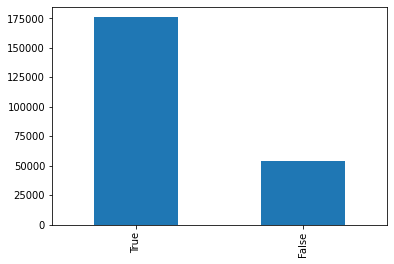

In [ ]:
run1.HasLateBuses.value_counts().plot(kind='bar')

In [ ]:
run1.drop('BusesThatReachedLate', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
run1['Date'] = pd.to_datetime(run1['timekey'])
run1['year'] = pd.DatetimeIndex(run1['timekey']).year
run1['month'] = pd.DatetimeIndex(run1['timekey']).month
run1['day'] = pd.DatetimeIndex(run1['timekey']).day
run1['dayofyear'] = pd.DatetimeIndex(run1['timekey']).dayofyear
run1['weekofyear'] = pd.DatetimeIndex(run1['timekey']).weekofyear
run1['weekday'] = pd.DatetimeIndex(run1['timekey']).weekday
run1['quarter'] = pd.DatetimeIndex(run1['timekey']).quarter
# run1['is_month_start'] = pd.DatetimeIndex(run1['timekey']).is_month_start
# run1['is_month_end'] = pd.DatetimeIndex(run1['timekey']).is_month_end

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
run1['hour'] = pd.DatetimeIndex(run1['timekey']).hour
run1['minute'] = pd.DatetimeIndex(run1['timekey']).minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
run1.drop('timekey', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
run1.drop('Date', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
run1['HasLateBuses']=run1['HasLateBuses'].apply(lambda x: 1 if x else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
features=run1.columns.tolist()
features.remove('HasLateBuses')

In [67]:
predicted_run1=run1['HasLateBuses']
predictor_run1=run1[features]

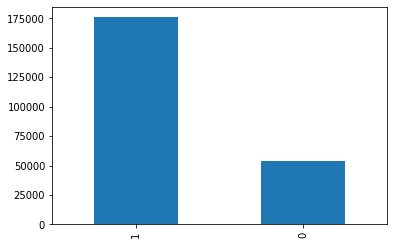

In [68]:
run1['HasLateBuses'].value_counts().plot(kind='bar')

In [ ]:
predictor_run1

,locationID,TaxiTripsBookedAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,year,month,day,dayofyear,weekofyear,weekday,quarter,hour,minute
0,42,2,2,1,2,2017,10,14,287,41,5,4,8,10
1,125,6,4,1,6,2017,10,15,288,41,6,4,21,50
2,232,1,2,1,4,2017,10,20,293,42,4,4,19,10
3,209,1,4,1,1,2017,10,25,298,43,2,4,6,50
4,232,3,2,1,2,2017,10,25,298,43,2,4,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229335,164,6,4,8,7,2017,10,1,274,39,6,4,8,10
229336,164,18,20,15,17,2017,6,30,181,26,4,2,7,40
229337,164,30,22,23,16,2017,10,20,293,42,4,4,7,40
229338,164,31,27,32,36,2017,12,18,352,51,0,4,12,20


In [258]:
def sussyFunc(a):
  if a==1:
    return 0
  return 1

In [264]:
predicted_run1=predicted_run1.apply(sussyFunc)

In [265]:
msk = np.random.rand(len(predictor_run1)) < 0.8
predictor_run1_train,predicted_run1_train = predictor_run1[msk],predicted_run1[msk]
predictor_run1_test,predicted_run1_test = predictor_run1[~msk],predicted_run1[~msk]

# Run 0

In [293]:
predictor_run0=predictor_run1.drop(['TaxiTripsBookedAtTimeSlot','TaxiTripsBookedAtTMinusFiveSlot','TaxiTripsBookedAtTMinusTenSlot','TaxiTripsBookedAtTMinusFifteenSlot'],axis=1)
predicted_run0=predicted_run1

In [294]:
predictor_run0

,locationID,year,month,day,dayofyear,weekofyear,weekday,quarter,hour,minute
0,42,2017,10,14,287,41,5,4,8,10
1,125,2017,10,15,288,41,6,4,21,50
2,232,2017,10,20,293,42,4,4,19,10
3,209,2017,10,25,298,43,2,4,6,50
4,232,2017,10,25,298,43,2,4,19,30
...,...,...,...,...,...,...,...,...,...,...
229335,164,2017,10,1,274,39,6,4,8,10
229336,164,2017,6,30,181,26,4,2,7,40
229337,164,2017,10,20,293,42,4,4,7,40
229338,164,2017,12,18,352,51,0,4,12,20


In [298]:
predicted_run0=predicted_run0.apply(sussyFunc)

In [300]:
msk = np.random.rand(len(predictor_run0)) < 0.8
predictor_run0_train,predicted_run0_train = predictor_run0[msk],predicted_run0[msk]
predictor_run0_test,predicted_run0_test = predictor_run0[~msk],predicted_run0[~msk]

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
Run_0_lRClf = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=0).fit(predictor_run0_train, predicted_run0_train)
Run_0_lr_Predict = Run_0_lRClf.predict(predictor_run0_test)
print('Training score:{}, Testing Score:{}'.format(Run_0_lRClf.score(predictor_run0_train,predicted_run0_train),Run_0_lRClf.score(predictor_run0_test,predicted_run0_test)))
(precision, recall, fscore, support) = precision_recall_fscore_support(predicted_run0_test, Run_0_lr_Predict, average='binary')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))

Training score:0.7663792492241911, Testing Score:0.7672835613161386
Precision: 0.0	Recall: 0.0	fscore:0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
Run_0_lRClf = DecisionTreeClassifier(max_depth=15).fit(predictor_run0_train, predicted_run0_train)
Run_0_lr_Predict = Run_0_lRClf.predict(predictor_run0_test)
print('Training score:{}, Testing Score:{}'.format(Run_0_lRClf.score(predictor_run0_train,predicted_run0_train),Run_0_lRClf.score(predictor_run0_test,predicted_run0_test)))
(precision, recall, fscore, support) = precision_recall_fscore_support(predicted_run0_test, Run_0_lr_Predict, average='binary')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))

Training score:0.8300310323576411, Testing Score:0.7706108779331492
Precision: 0.5131782945736434	Recall: 0.2783851976450799	fscore:0.3609596510359869


# Do Taxis Contribute anything at all

In [286]:
predictor_runx=predictor_run1.drop(['year','month','day','dayofyear','weekofyear','weekday','quarter','hour','minute'],axis=1)
predicted_runx=predicted_run1

In [287]:
msk = np.random.rand(len(predictor_runx)) < 0.8
predictor_runx_train,predicted_runx_train = predictor_runx[msk],predicted_runx[msk]
predictor_runx_test,predicted_runx_test = predictor_runx[~msk],predicted_runx[~msk]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
Run_x_lRClf = DecisionTreeClassifier(max_depth=15).fit(predictor_runx_train, predicted_runx_train)
Run_x_lr_Predict = Run_x_lRClf.predict(predictor_runx_test)
print('Training score:{}, Testing Score:{}'.format(Run_x_lRClf.score(predictor_runx_train,predicted_runx_train),Run_x_lRClf.score(predictor_runx_test,predicted_runx_test)))
(precision, recall, fscore, support) = precision_recall_fscore_support(predicted_runx_test, Run_x_lr_Predict, average='binary')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))

Training score:0.8014032065504778, Testing Score:0.7629130993616975
Precision: 0.47152068780225687	Recall: 0.16446443632274388	fscore:0.2438685472104495


## Logistic Regression on data_1

In [266]:
Run_1_lRClf = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=0).fit(predictor_run1_train, predicted_run1_train)

In [267]:
Run_1_lr_Predict = Run_1_lRClf.predict(predictor_run1_test)
print('Training score:{}, Testing Score:{}'.format(Run_1_lRClf.score(predictor_run1_train,predicted_run1_train),Run_1_lRClf.score(predictor_run1_test,predicted_run1_test)))
(precision, recall, fscore, support) = precision_recall_fscore_support(predicted_run1_test, Run_1_lr_Predict, average='binary')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))

Training score:0.7664755510017223, Testing Score:0.7669007327285415
Precision: 0.0	Recall: 0.0	fscore:0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


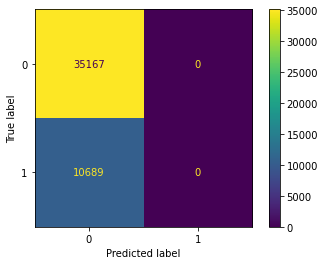

In [269]:
plot_confusion_matrix(Run_1_lRClf, predictor_run1_test, predicted_run1_test) 

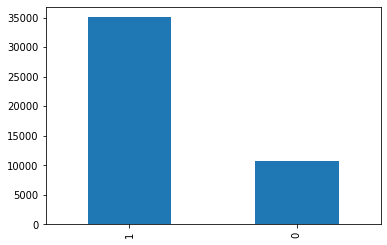

In [239]:
predicted_run1_test.value_counts().plot(kind='bar')

#Decision Trees on Data_1

In [270]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

In [271]:
Run_1_dt_clf= DecisionTreeClassifier(max_depth=15).fit(predictor_run1_train, predicted_run1_train)

In [272]:
Run_1_dt_Predict = Run_1_dt_clf.predict(predictor_run1_test)
print('Training score:{}, Testing Score:{}'.format(Run_1_dt_clf.score(predictor_run1_train,predicted_run1_train),Run_1_dt_clf.score(predictor_run1_test,predicted_run1_test)))
(precision, recall, fscore, support) = precision_recall_fscore_support(predicted_run1_test, Run_1_dt_Predict, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))

Training score:0.8384055285474483, Testing Score:0.7613180390788555
Precision: 0.6416469963847283	Recall: 0.5909772180591522	fscore:0.6004095903067094


In [273]:
confusion_matrix(predicted_run1_test,Run_1_dt_Predict)

array([[32005,  3162],
       [ 7783,  2906]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


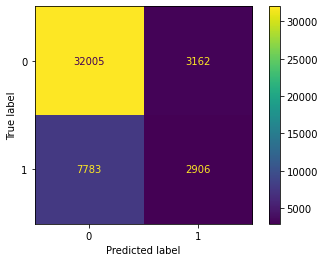

In [274]:
plot_confusion_matrix(Run_1_dt_clf, predictor_run1_test, predicted_run1_test) 

In [232]:
Run_1_dt_Predict

array([1, 1, 1, ..., 1, 0, 1])

# Testing out logit and Decision Trees when using the full set

In [54]:
data_2=data.drop(['BusesThatReachedStop','OnTimeBuses','AvgLeadTime','AvgLateTime'], axis=1)

In [58]:
data_2['year'] = pd.DatetimeIndex(data_2['timekey']).year
data_2['month'] = pd.DatetimeIndex(data_2['timekey']).month
data_2['day'] = pd.DatetimeIndex(data_2['timekey']).day
data_2['dayofyear'] = pd.DatetimeIndex(data_2['timekey']).dayofyear
data_2['weekofyear'] = pd.DatetimeIndex(data_2['timekey']).weekofyear
data_2['weekday'] = pd.DatetimeIndex(data_2['timekey']).weekday
data_2['quarter'] = pd.DatetimeIndex(data_2['timekey']).quarter
data_2['hour'] = pd.DatetimeIndex(data_2['timekey']).hour
data_2['minute'] = pd.DatetimeIndex(data_2['timekey']).minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [59]:
data_2['HasLateBuses']=data_2['BusesThatReachedLate'].apply(binaryEncode)

In [74]:
data_2.drop(['BusesThatReachedLate','timekey','Date'],axis=1,inplace=True)

KeyError: ignored

In [75]:
data_2.drop(['Date'],axis=1,inplace=True)

In [76]:
features=data_2.columns.tolist()
features.remove('HasLateBuses')
predicted_run2=data_2['HasLateBuses']
predictor_run2=data_2[features]

In [289]:
predicted_run2=predicted_run2.apply(sussyFunc)

In [291]:
msk = np.random.rand(len(predictor_run1)) < 0.8
predictor_run2_train,predicted_run2_train = predictor_run2[msk],predicted_run2[msk]
predictor_run2_test,predicted_run2_test = predictor_run2[~msk],predicted_run2[~msk]

In [292]:
Run_2_dt_clf= DecisionTreeClassifier(max_depth=15)
Run_2_lRClf = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=0)
models=[Run_2_dt_clf,Run_2_lRClf]
modelName=['Decision Tree','Logistic Regression']
i=0
for model in models:
  print('Model Name:{}'.format(modelName[i]))
  model=model.fit(predictor_run2_train, predicted_run2_train)
  Run_2_model_Predict = model.predict(predictor_run2_test)
  print('Training score:{}, Testing Score:{}'.format(model.score(predictor_run2_train,predicted_run2_train),model.score(predictor_run2_test,predicted_run2_test)))
  (precision, recall, fscore, support) = precision_recall_fscore_support(predicted_run2_test, Run_2_model_Predict, average='binary')
  print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
  i+=1

Model Name:Decision Tree
Training score:0.838138500046352, Testing Score:0.7609059855094537
Precision: 0.4845814977973568	Recall: 0.2542999815054559	fscore:0.333555703802535
Model Name:Logistic Regression
Training score:0.7669089699474858, Testing Score:0.7645395008811818
Precision: 0.1	Recall: 9.24727205474385e-05	fscore:0.00018477457501847748


# Testing out the regression models

In [83]:
run3=data[['timekey','locationID','BusesThatReachedLate','TaxiTripsBookedAtTimeSlot','TaxiTripsBookedAtTMinusFiveSlot','TaxiTripsBookedAtTMinusTenSlot','TaxiTripsBookedAtTMinusFifteenSlot']]

In [84]:
run3['year'] = pd.DatetimeIndex(run3['timekey']).year
run3['month'] = pd.DatetimeIndex(run3['timekey']).month
run3['day'] = pd.DatetimeIndex(run3['timekey']).day
run3['dayofyear'] = pd.DatetimeIndex(run3['timekey']).dayofyear
run3['weekofyear'] = pd.DatetimeIndex(run3['timekey']).weekofyear
run3['weekday'] = pd.DatetimeIndex(run3['timekey']).weekday
run3['quarter'] = pd.DatetimeIndex(run3['timekey']).quarter
run3['hour'] = pd.DatetimeIndex(run3['timekey']).hour
run3['minute'] = pd.DatetimeIndex(run3['timekey']).minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [90]:
#run3.drop('timekey',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
run3

,locationID,BusesThatReachedLate,TaxiTripsBookedAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,year,month,day,dayofyear,weekofyear,weekday,quarter,hour,minute
0,42,0,2,2,1,2,2017,10,14,287,41,5,4,8,10
1,125,0,6,4,1,6,2017,10,15,288,41,6,4,21,50
2,232,0,1,2,1,4,2017,10,20,293,42,4,4,19,10
3,209,0,1,4,1,1,2017,10,25,298,43,2,4,6,50
4,232,0,3,2,1,2,2017,10,25,298,43,2,4,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229335,164,3,6,4,8,7,2017,10,1,274,39,6,4,8,10
229336,164,3,18,20,15,17,2017,6,30,181,26,4,2,7,40
229337,164,3,30,22,23,16,2017,10,20,293,42,4,4,7,40
229338,164,2,31,27,32,36,2017,12,18,352,51,0,4,12,20


In [103]:
run3['HasLateBuses']=run3['BusesThatReachedLate'].apply(binaryEncode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


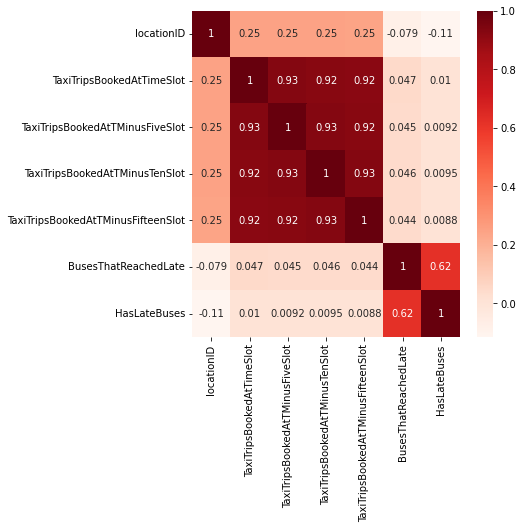

In [107]:
plt.figure(figsize=(6,6))
cor = run3[['locationID','TaxiTripsBookedAtTimeSlot','TaxiTripsBookedAtTMinusFiveSlot','TaxiTripsBookedAtTMinusTenSlot','TaxiTripsBookedAtTMinusFifteenSlot','BusesThatReachedLate','HasLateBuses']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [151]:
run3_predict=run3['BusesThatReachedLate']

In [172]:
features=run3.columns.tolist()
features.remove('HasLateBuses')
features.remove('BusesThatReachedLate')
predicted_run3=run3_predict
predictor_run3=run3[features]

In [175]:
predicted_run3

0         0
1         0
2         0
3         0
4         0
         ..
229335    3
229336    3
229337    3
229338    2
229339    4
Name: BusesThatReachedLate, Length: 229340, dtype: int64

In [112]:
run3.drop(['HasLateBuses','BusesThatReachedLate'],axis=1)

,locationID,TaxiTripsBookedAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,year,month,day,dayofyear,weekofyear,weekday,quarter,hour,minute
0,42,2,2,1,2,2017,10,14,287,41,5,4,8,10
1,125,6,4,1,6,2017,10,15,288,41,6,4,21,50
2,232,1,2,1,4,2017,10,20,293,42,4,4,19,10
3,209,1,4,1,1,2017,10,25,298,43,2,4,6,50
4,232,3,2,1,2,2017,10,25,298,43,2,4,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229335,164,6,4,8,7,2017,10,1,274,39,6,4,8,10
229336,164,18,20,15,17,2017,6,30,181,26,4,2,7,40
229337,164,30,22,23,16,2017,10,20,293,42,4,4,7,40
229338,164,31,27,32,36,2017,12,18,352,51,0,4,12,20


In [125]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [176]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

predictor_run3 = pipeline.fit_transform(predictor_run3)

In [158]:
np.unique(predicted_run3)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [180]:
predictor_run3

array([[-1.35376444, -1.08782365, -1.08569283, ...,  0.89674767,
        -0.94607496, -1.02513576],
       [-0.2140661 , -0.86474045, -0.97409312, ...,  0.89674767,
         1.32237636,  1.29631213],
       [ 1.25518356, -1.14359445, -1.08569283, ...,  0.89674767,
         0.97338385, -1.02513576],
       ...,
       [ 0.3214548 ,  0.47375878,  0.03030428, ...,  0.89674767,
        -1.12057122,  0.71595016],
       [ 0.3214548 ,  0.52952958,  0.30930356, ...,  0.89674767,
        -0.24808994, -0.44477379],
       [ 0.3214548 ,  0.13913397,  0.7557024 , ..., -1.50099182,
         0.27539883, -0.73495477]])

In [181]:
msk = np.random.rand(len(predictor_run1)) < 0.8
predictor_run3_train,predicted_run3_train = predictor_run3[msk],predicted_run3[msk]
predictor_run3_test,predicted_run3_test = predictor_run3[~msk],predicted_run3[~msk]

In [182]:
predictor_run3_test

array([[-1.35376444, -1.08782365, -1.08569283, ...,  0.89674767,
        -0.94607496, -1.02513576],
       [-1.35376444, -1.08782365, -1.14149269, ...,  0.89674767,
         0.10090257, -0.1545928 ],
       [ 1.25518356, -1.14359445, -1.14149269, ...,  0.89674767,
        -0.77157871,  0.13558819],
       ...,
       [ 0.3214548 ,  0.97569599,  0.14190399, ..., -1.50099182,
        -0.24808994, -0.44477379],
       [-0.4612296 , -0.02817843,  0.36510341, ...,  0.89674767,
         1.49687261, -1.60549773],
       [ 0.3214548 , -0.80896965, -0.30449485, ..., -1.50099182,
        -1.46956373,  1.00613115]])

In [202]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(predictor_run3_train,predicted_run3_train)

LinearRegression()

In [203]:
predicted_lr_reg= lin_reg.predict(predictor_run3_test)

In [204]:
predicted_lr_reg

array([1.17050462, 1.14786517, 0.8597233 , ..., 1.07802637, 1.10918426,
       0.99393911])

In [205]:
print_evaluate(predicted_run3_test,predicted_lr_reg)

MAE: 0.6137372439268999
MSE: 0.9117963525271624
RMSE: 0.9548802817773349
R2 Square 0.012169594424838892
__________________________________


In [206]:
predicted_lr_reg.size

45805

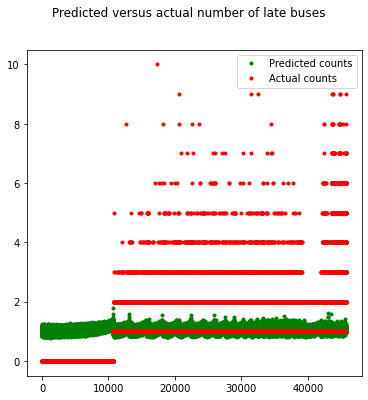

In [207]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Predicted versus actual number of late buses')
predicted, = plt.plot( list(range(1,predicted_lr_reg.size+1)),predicted_lr_reg, '.g', label='Predicted counts')
actual, = plt.plot( list(range(1,predicted_lr_reg.size+1)),predicted_run3_test, '.r', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()